/tmp/ipykernel_2226423/1707237745.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # make space for colorbar


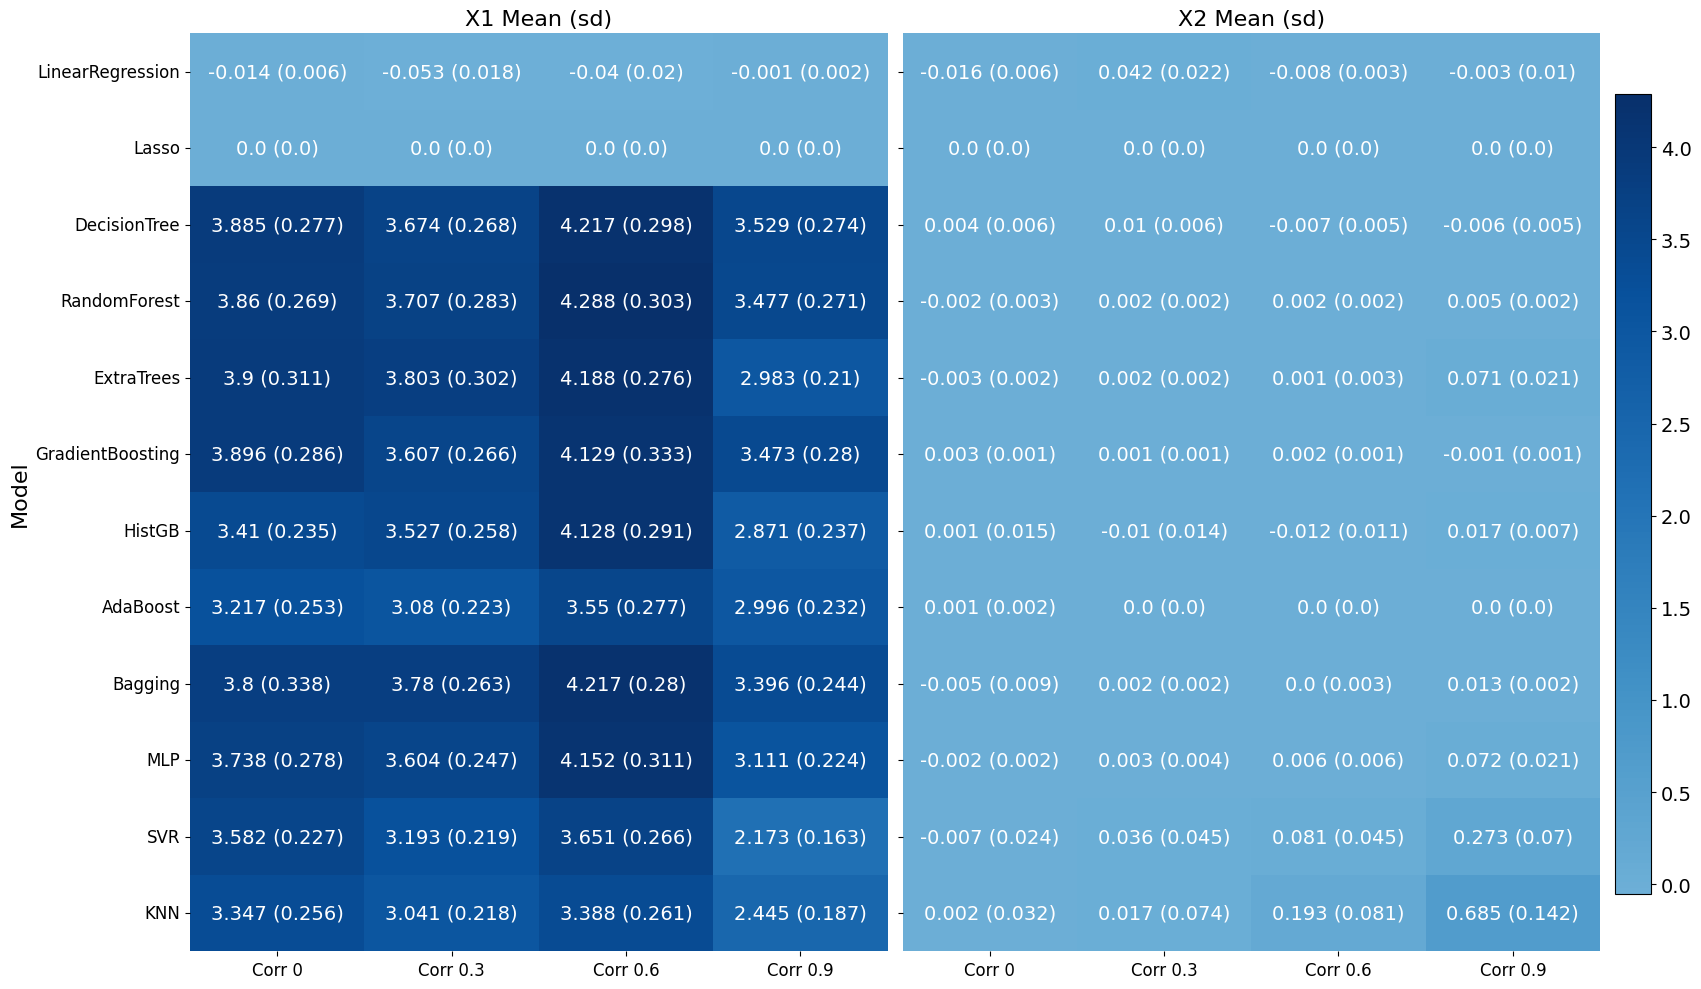

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mean data
mean_data = {
    'Model': [
        'LinearRegression', 'Lasso', 'DecisionTree', 'RandomForest', 'ExtraTrees', 
        'GradientBoosting', 'HistGB', 'AdaBoost', 'Bagging', 'MLP', 'SVR', 'KNN'
    ],
    'x1_corr0': [-0.0141, 0.0, 3.8847, 3.8598, 3.8995, 3.8958, 3.4099, 3.2169, 3.8003, 3.7381, 3.5815, 3.3468],
    'x1_corr03': [-0.0528, 0.0, 3.6738, 3.7074, 3.8028, 3.6072, 3.5267, 3.0799, 3.7804, 3.6038, 3.1929, 3.0411],
    'x1_corr06': [-0.0397, 0.0, 4.2172, 4.2885, 4.1880, 4.1289, 4.1285, 3.5502, 4.2171, 4.1516, 3.6509, 3.3885],
    'x1_corr09': [-0.0013, 0.0, 3.5290, 3.4769, 2.9830, 3.4726, 2.8713, 2.9962, 3.3956, 3.1114, 2.1729, 2.4446],
    'x2_corr0': [-0.0158, 0.0, 0.0038, -0.0015, -0.0034, 0.0028, 0.0012, 0.0009, -0.0050, -0.0016, -0.0071, 0.0018],
    'x2_corr03': [0.0423, 0.0, 0.0096, 0.0015, 0.0017, 0.0011, -0.0099, 0.0, 0.0021, 0.0033, 0.0356, 0.0171],
    'x2_corr06': [-0.0075, 0.0, -0.0072, 0.0015, 0.0011, 0.0019, -0.0123, 0.0, 0.0002, 0.0058, 0.0810, 0.1928],
    'x2_corr09': [-0.0026, 0.0, -0.0062, 0.0050, 0.0714, -0.0011, 0.0174, 0.0, 0.0132, 0.0718, 0.2730, 0.6853]
}

# Std data
std_data = {
    'Model': [
        'LinearRegression', 'Lasso', 'DecisionTree', 'RandomForest', 'ExtraTrees', 
        'GradientBoosting', 'HistGB', 'AdaBoost', 'Bagging', 'MLP', 'SVR', 'KNN'
    ],
    'x1_corr0': [0.0059,0,0.2771,0.2694,0.3114,0.2860,0.2350,0.2530,0.3375,0.2777,0.2271,0.2558],
    'x1_corr03': [0.0181,0,0.2684,0.2826,0.3025,0.2655,0.2583,0.2231,0.2628,0.2470,0.2188,0.2175],
    'x1_corr06': [0.0196,0,0.2975,0.3030,0.2762,0.3334,0.2908,0.2773,0.2795,0.3112,0.2664,0.2610],
    'x1_corr09': [0.0023,0,0.2745,0.2713,0.2105,0.2798,0.2374,0.2320,0.2443,0.2243,0.1626,0.1872],
    'x2_corr0': [0.0063,0,0.0055,0.0027,0.0024,0.0013,0.0151,0.0015,0.0094,0.0022,0.0239,0.0323],
    'x2_corr03': [0.0219,0,0.0057,0.0020,0.0024,0.0012,0.0142,0.0,0.0024,0.0042,0.0453,0.0745],
    'x2_corr06': [0.0033,0,0.0054,0.0025,0.0030,0.0014,0.0111,0.0,0.0029,0.0058,0.0447,0.0812],
    'x2_corr09': [0.0104,0,0.0050,0.0020,0.0214,0.0013,0.0070,0.0,0.0024,0.0210,0.0697,0.1422]
}

df_mean = pd.DataFrame(mean_data).set_index('Model')
df_std = pd.DataFrame(std_data).set_index('Model')

# Prepare data
x1_mean = df_mean[['x1_corr0','x1_corr03','x1_corr06','x1_corr09']]
x2_mean = df_mean[['x2_corr0','x2_corr03','x2_corr06','x2_corr09']]
x1_std = df_std[['x1_corr0','x1_corr03','x1_corr06','x1_corr09']]
x2_std = df_std[['x2_corr0','x2_corr03','x2_corr06','x2_corr09']]

x1_mean.columns = x2_mean.columns = ['Corr 0','Corr 0.3','Corr 0.6','Corr 0.9']
x1_std.columns = x2_std.columns = ['Corr 0','Corr 0.3','Corr 0.6','Corr 0.9']

# Shared color scale
vmin = min(x1_mean.min().min(), x2_mean.min().min())
vmax = max(x1_mean.max().max(), x2_mean.max().max())

# Annotations "mean (std)"
x1_annot = x1_mean.round(3).astype(str) + " (" + x1_std.round(3).astype(str) + ")"
x2_annot = x2_mean.round(3).astype(str) + " (" + x2_std.round(3).astype(str) + ")"

# Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 10), sharey=True)

# Draw heatmaps without individual colorbars
hm1 = sns.heatmap(
    x1_mean, annot=x1_annot, fmt='', cmap='Blues', center=0,
    vmin=vmin, vmax=vmax, ax=axes[0], cbar=False, annot_kws={"size":14}
)
axes[0].set_title("X1 Mean (sd)", fontsize=16)
axes[0].set_ylabel("Model", fontsize=16)
axes[0].tick_params(axis="x", labelsize=12)
axes[0].tick_params(axis="y", labelsize=12)

hm2 = sns.heatmap(
    x2_mean, annot=x2_annot, fmt='', cmap='Blues', center=0,
    vmin=vmin, vmax=vmax, ax=axes[1], cbar=False, annot_kws={"size":14}
)
axes[1].set_title("X2 Mean (sd)", fontsize=16)
axes[1].set_ylabel("")
axes[1].tick_params(axis="x", labelsize=12)
axes[1].tick_params(axis="y", labelsize=12)

# Add ONE shared colorbar
cbar_ax = fig.add_axes([0.9, 0.1, 0.02, 0.8])  # [left, bottom, width, height]
fig.colorbar(hm2.collections[0], cax=cbar_ax)
cbar_ax.tick_params(labelsize=14)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # make space for colorbar
plt.savefig(f"../../results/figures/asympt_relevance.pdf")
plt.show()
